<a href="https://colab.research.google.com/github/Osstrinha/Fisica-Computacional-2/blob/main/Lista_5_Fis_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

print("link para arquivo: https://colab.research.google.com/drive/1CoKyo0BhjcO1Yx8k_EwoFXlct3KpWZA9?usp=sharing")

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
link para arquivo: https://colab.research.google.com/drive/1CoKyo0BhjcO1Yx8k_EwoFXlct3KpWZA9?usp=sharing


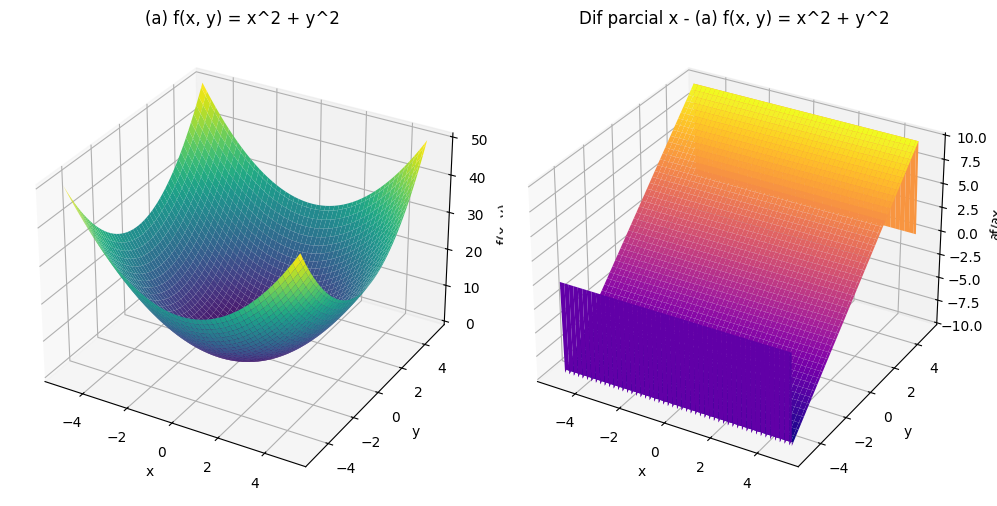

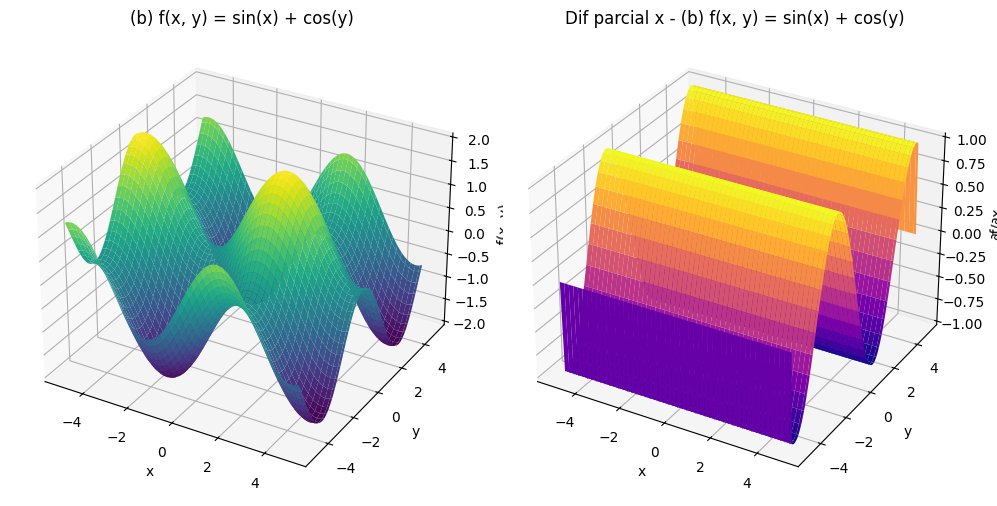

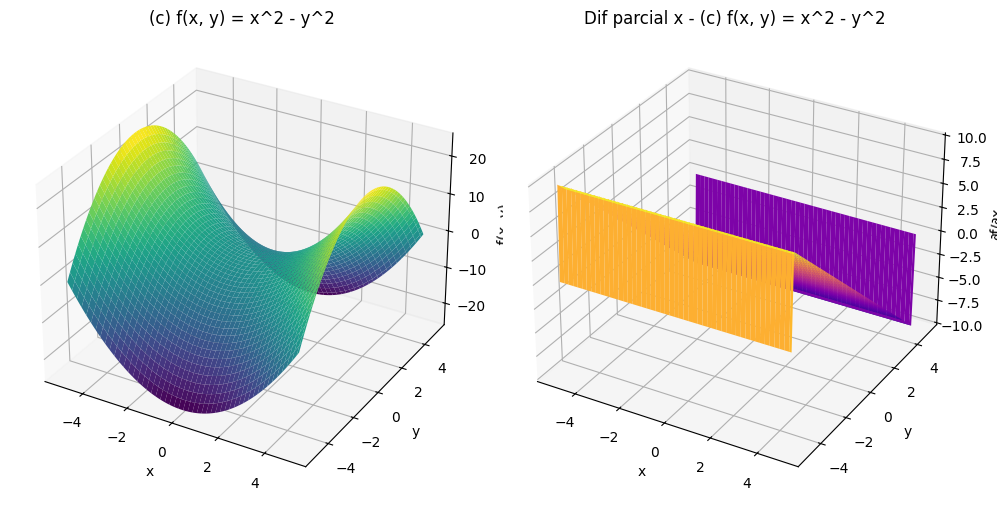

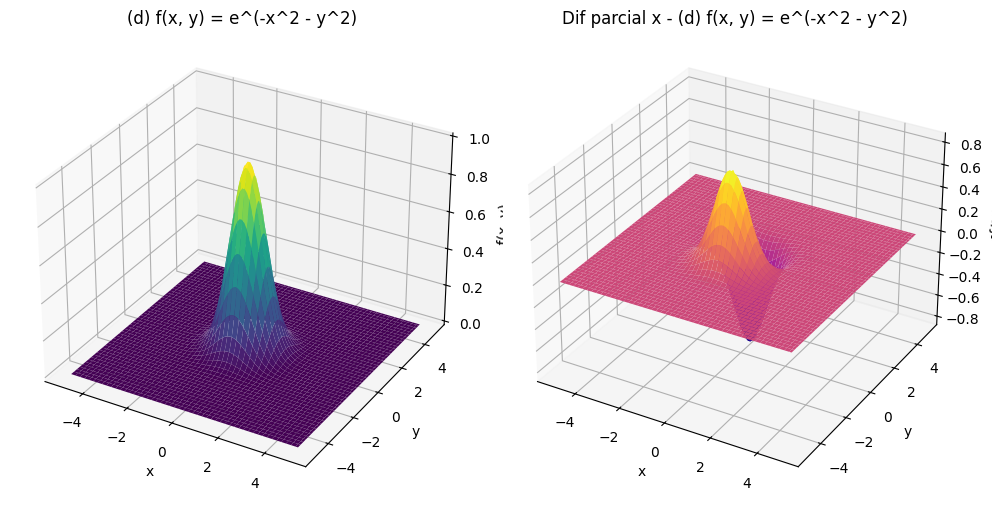

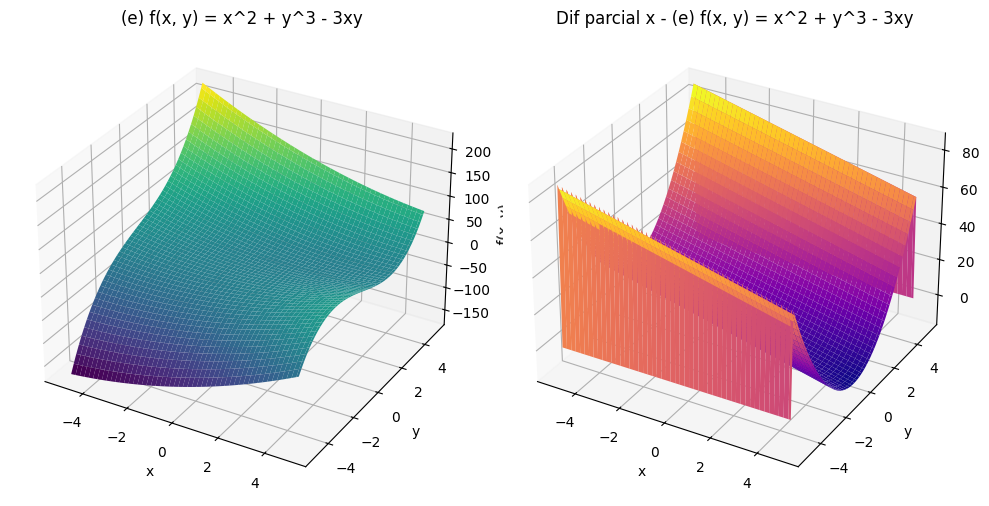

In [ ]:
# Exercício 1 - Gráfico de funções de duas variáveis e suas derivadas

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definição do grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]  # Passo no grid para x

# Lista de funções (dicionário)
funcoes = {
    "(a) f(x, y) = x^2 + y^2": lambda X, Y: X**2 + Y**2,
    "(b) f(x, y) = sin(x) + cos(y)": lambda X, Y: np.sin(X) + np.cos(Y),
    "(c) f(x, y) = x^2 - y^2": lambda X, Y: X**2 - Y**2,
    "(d) f(x, y) = e^(-x^2 - y^2)": lambda X, Y: np.exp(-X**2 - Y**2),
    "(e) f(x, y) = x^2 + y^3 - 3xy": lambda X, Y: X**2 + Y**3 - 3 * X * Y
}

# Loop sobre cada função
for titulo, funcao in funcoes.items():
    Z = funcao(X, Y)  # Avaliação da função

    # Derivada parcial numérica em relação a x
    dZ_dx = np.zeros_like(Z)
    dZ_dx[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dx)  # Método das diferenças centrais

    # Gráficos
    fig = plt.figure(figsize=(10, 5))

    # Gráfico da superfície da função
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_title(titulo)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x, y)')

    # Gráfico da derivada parcial
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, dZ_dx, cmap='plasma', edgecolor='none')
    ax2.set_title(f"Dif parcial x - {titulo}")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('∂f/∂x')

    plt.tight_layout()
    plt.show()


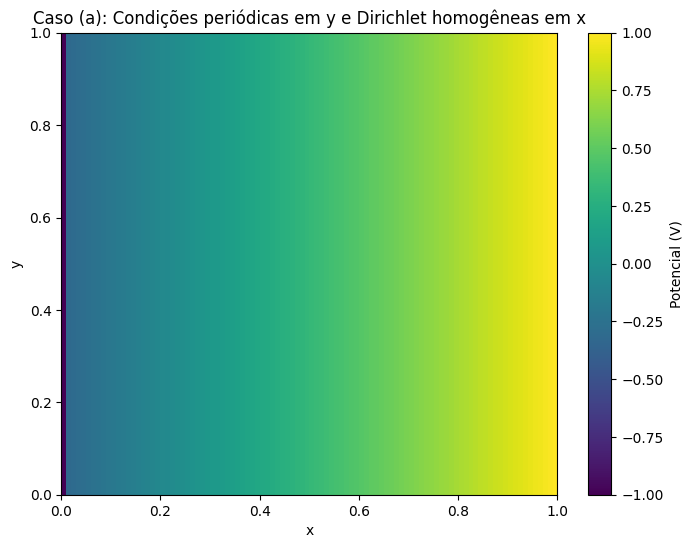

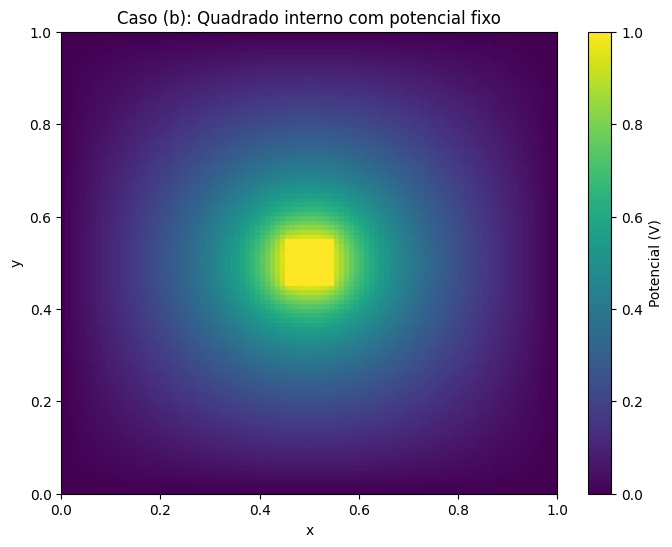

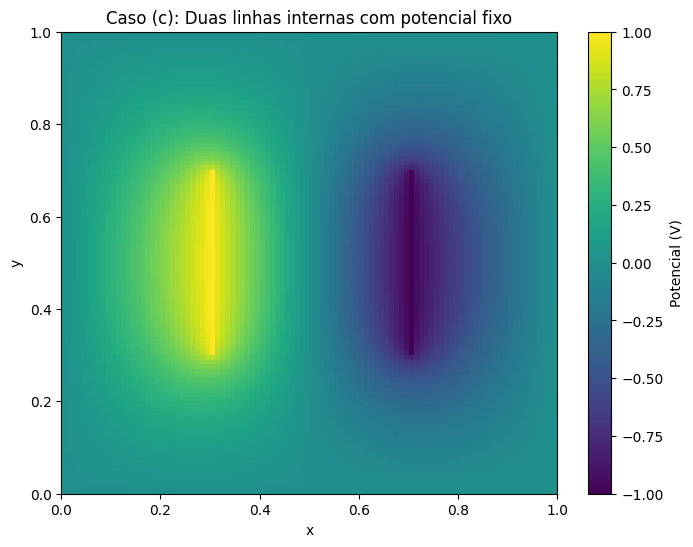

In [4]:
# Exercício 2 - Equação de Laplace 2D

import numpy as np
import matplotlib.pyplot as plt

def solve_laplace_weighted(Nx, Ny, Lx, Ly, delta, boundary_condition):
    # Configuração do grid
    dx = Lx / (Nx - 1)
    dy = Ly / (Ny - 1)
    V = np.zeros((Nx, Ny))  # Inicialização do potencial

    # Configuração do máximo de iterações
    max_iter = 10000

    # Coeficientes da fórmula ponderada
    Dx2 = 1 / dx**2
    Dy2 = 1 / dy**2
    coeff = (dy**2 * dx**2)/(2*(dy**2 + dx**2))

    # Aplicação das condições de contorno
    boundary_condition(V)

    # Iteração até convergência
    converged = False
    iteration = 0
    while not converged or iteration < max_iter:
        V_old = V.copy()
        for i in range(Nx):  # Laço até o final (incluindo as bordas)
            for j in range(Ny):  # Laço até o final (incluindo as bordas)
                if j == 0:  # Borda inferior (y=0) - periodicidade com y=Ly

                    if i == 0:  # Borda esquerda (x=0) - periodicidade com x=Lx
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, Ny-1]) + Dx2 * (V[i+1, j] + V[Nx-1, j]))
                    elif i == Nx-1:  # Borda direita (x=Lx) - periodicidade com x=0
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, Ny-1]) + Dx2 * (V[0, j] + V[i-1, j]))
                    else:
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, Ny-1]) + Dx2 * (V[i+1, j] + V[i-1, j]))


                elif j == Ny-1:  # Borda superior (y=Ly) - periodicidade com y=0

                    if i == 0:  # Borda esquerda (x=0) - periodicidade com x=Lx
                        V[i, j] = coeff * (Dy2 * (V_old[i, 0] + V_old[i, j-1]) + Dx2 * (V[i+1, j] + V[Nx-1, j]))
                    elif i == Nx-1:  # Borda direita (x=Lx) - periodicidade com x=0
                        V[i, j] = coeff * (Dy2 * (V_old[i, 0] + V_old[i, j-1]) + Dx2 * (V[0, j] + V[i-1, j]))
                    else:
                        V[i, j] = coeff * (Dy2 * (V_old[i, 0] + V_old[i, j-1]) + Dx2 * (V[i+1, j] + V[i-1, j]))

                if i == 0:  # Borda esquerda (x=0) - periodicidade com y=Lx

                    if j == 0:  # inferior (y=0) - periodicidade com x=Ly
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, Ny-1]) + Dx2 * (V[i+1, j] + V[Nx-1, j]))
                    elif j == Ny-1:  # Borda superior (y=Ny) - periodicidade com y=0
                        V[i, j] = coeff * (Dy2 * (V_old[i, 0] + V_old[i, j-1]) + Dx2 * (V[i+1, j] + V[Nx-1, j]))
                    else:
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, j-1]) + Dx2 * (V[i+1, j] + V[Nx-1, j]))

                if i == Nx-1:  # Borda direita (x=Lx) - periodicidade com y=0

                    if j == 0:  # Borda inferior (y=0) - periodicidade com x=Ly
                        V[i,j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, Ny-1]) + Dx2 * (V[0, j] + V[i-1, j]))
                    elif j == Ny-1:  # Borda superior (y=Ny) - periodicidade com y=Ly
                        V[i,j] = coeff * (Dy2 * (V_old[i, 0] + V_old[i, j-1]) + Dx2 * (V[0, j] + V[i-1, j]))
                    else:
                        V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, j-1]) + Dx2 * (V[0, j] + V[i-1, j]))


                if j != Ny-1 and j!= 0 and i != Nx-1 and i != 0 : # Para pontos internos
                    V[i, j] = coeff * (Dy2 * (V_old[i, j+1] + V_old[i, j-1]) + Dx2 * (V[i+1, j] + V[i-1, j]))

        # Reaplicar a condição de contorno a cada iteração
        boundary_condition(V)

        # Critério de convergência
        diff = np.abs(V - V_old).max()
        iteration += 1
        if diff < delta:
            converged = True

    return V

def plot_potential(V, title, Lx=1, Ly=1):
    plt.figure(figsize=(8, 6))
    plt.imshow(V.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='viridis')
    plt.colorbar(label='Potencial (V)')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

    # Garantir a proporção correta para os eixos
    plt.gca().set_aspect('auto', adjustable='box')
    plt.show()

# Caso (a): Condições periódicas em y e Dirichlet homogêneas em x
def boundary_a(V):
    V[0, :] = -1  # x = 0
    V[-1, :] = 1  # x = Lx

V_a = solve_laplace_weighted(Nx=100, Ny=100, Lx=1, Ly=1, delta=1e-6, boundary_condition=boundary_a)
plot_potential(V_a, "Caso (a): Condições periódicas em y e Dirichlet homogêneas em x")

# Caso (b): Quadrado interno com potencial fixo
def boundary_b(V):
    V[0, :] = 0  # x = 0
    V[-1, :] = 0  # x = Lx
    V[:, 0] = 0  # y = 0
    V[:, -1] = 0  # y = Ly
    V[45:55, 45:55] = 1  # Quadrado interno

V_b = solve_laplace_weighted(Nx=100, Ny=100, Lx=1, Ly=1, delta=1e-6, boundary_condition=boundary_b)
plot_potential(V_b, "Caso (b): Quadrado interno com potencial fixo")

# Caso (c): Duas linhas internas com potencial fixo
def boundary_c(V):
    V[0, :] = 0  # x = 0
    V[-1, :] = 0  # x = Lx
    V[:, 0] = 0  # y = 0
    V[:, -1] = 0  # y = Ly
    V[30, 30:70] = 1  # Linha 1
    V[70, 30:70] = -1  # Linha 2

V_c = solve_laplace_weighted(Nx=100, Ny=100, Lx=1, Ly=1, delta=1e-6, boundary_condition=boundary_c)
plot_potential(V_c, "Caso (c): Duas linhas internas com potencial fixo")






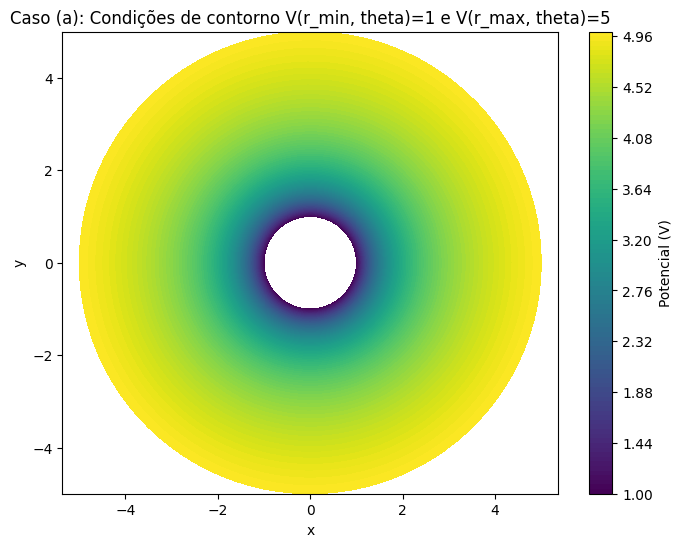

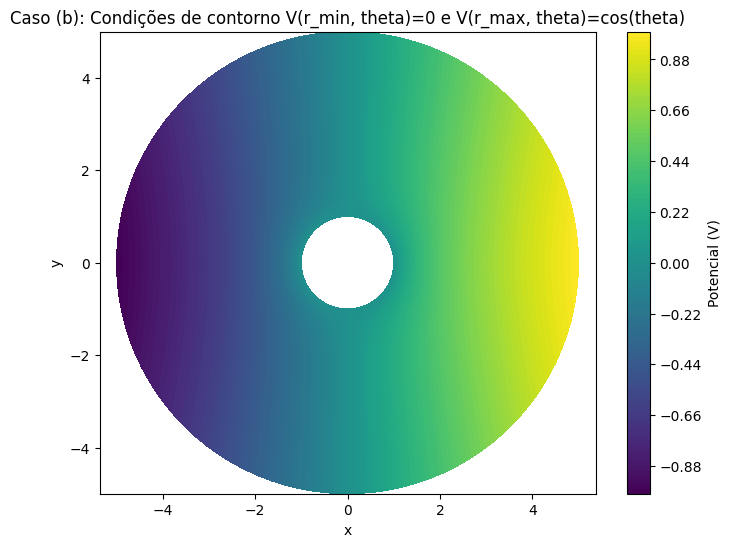

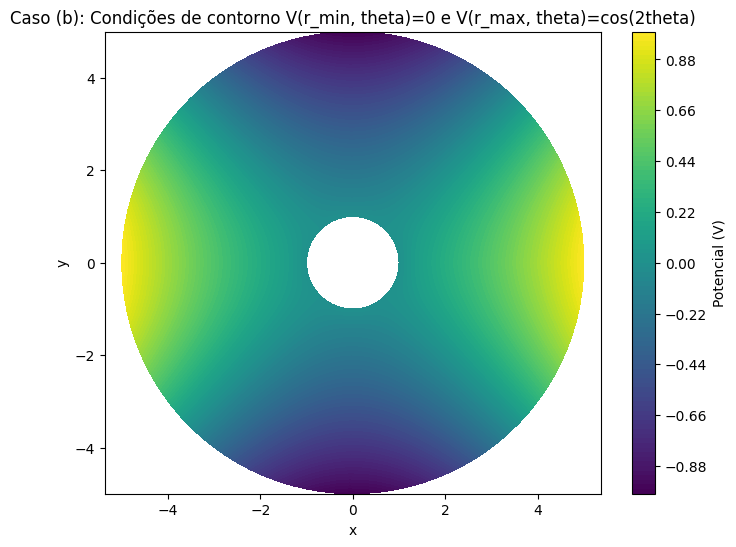

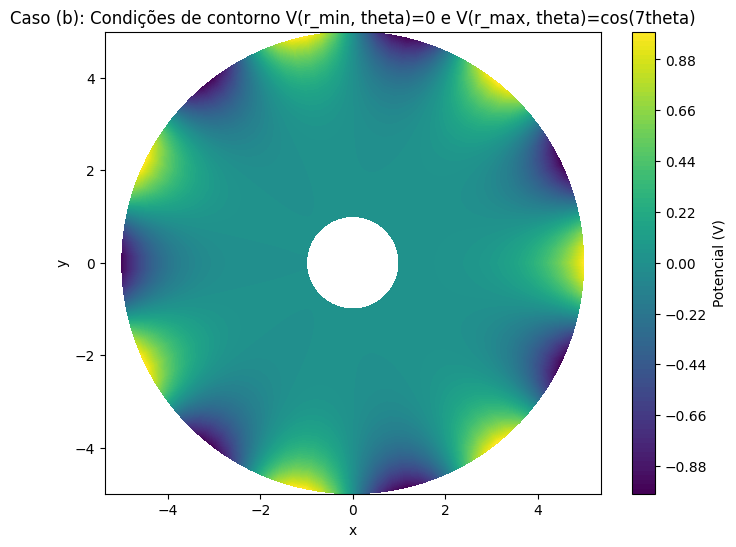

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def solve_laplace_polar(Nr, Ntheta, r_min, r_max, delta, boundary_condition):
    # Configuração do grid
    dr = (r_max - r_min) / (Nr - 1)
    dtheta = 2 * np.pi / Ntheta
    r = np.linspace(r_min, r_max, Nr)
    V = np.zeros((Nr, Ntheta))

    # Máximo de iterações
    max_iter = 10000

    # Aplicação das condições de contorno
    boundary_condition(V, r, dtheta)

    # Iteração até convergência
    converged = False
    iteration = 0
    while not converged and iteration < max_iter:
        V_old = V.copy()
        for i in range(1, Nr - 1):
            for j in range(Ntheta):
                jp = (j + 1) % Ntheta  # Índice para theta + 1 com condição periódica
                jm = (j - 1) % Ntheta  # Índice para theta - 1 com condição periódica

                V[i, j] = ((V_old[i + 1, j] + V_old[i - 1, j]) / dr**2 +
                           (1 / (r[i] * dr)) * V_old[i + 1, j] -
                           (1 / (r[i] * dr)) * V_old[i - 1, j] +
                           (V_old[i, jp] + V_old[i, jm]) / (r[i]**2 * dtheta**2)) / (2 / dr**2 + 2 / (r[i]**2 * dtheta**2))

        # Reaplicar as condições de contorno
        boundary_condition(V, r, dtheta)

        # Critério de convergência
        diff = np.abs(V - V_old).max()
        iteration += 1
        if diff < delta:
            converged = True

    return V, r

def plot_polar(V, r, title):
    R, Theta = np.meshgrid(r, np.linspace(0, 2 * np.pi, V.shape[1]))
    X, Y = R * np.cos(Theta), R * np.sin(Theta)

    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, V.T, levels=100, cmap='viridis')
    plt.colorbar(label='Potencial (V)')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.show()

# Caso (a): Condições de contorno especificadas no problema
def boundary_a(V, r, dtheta):
    V[0, :] = 1  # r = r_min
    V[-1, :] = 5  # r = r_max

V_a, r = solve_laplace_polar(Nr=100, Ntheta=100, r_min=1, r_max=5, delta=1e-6, boundary_condition=boundary_a)
plot_polar(V_a, r, "Caso (a): Condições de contorno V(r_min, theta)=1 e V(r_max, theta)=5")

# Caso (b): Condições de contorno com coseno
def boundary_b1(V, r, dtheta):
        V[0, :] = 0  # r = r_min
        theta = np.linspace(0, 2 * np.pi, V.shape[1])
        V[-1, :] = np.cos(theta)  # r = r_max

def boundary_b2(V, r, dtheta):
        V[0, :] = 0  # r = r_min
        theta = np.linspace(0, 2 * np.pi, V.shape[1])
        V[-1, :] = np.cos(2 * theta)  # r = r_max

def boundary_b7(V, r, dtheta):
        V[0, :] = 0  # r = r_min
        theta = np.linspace(0, 2 * np.pi, V.shape[1])
        V[-1, :] = np.cos(7 * theta)  # r = r_max

V_b1, r = solve_laplace_polar(Nr=100, Ntheta=100, r_min=1, r_max=5, delta=1e-6, boundary_condition=boundary_b1)
plot_polar(V_b1, r, "Caso (b): Condições de contorno V(r_min, theta)=0 e V(r_max, theta)=cos(theta)")

V_b2, r = solve_laplace_polar(Nr=100, Ntheta=100, r_min=1, r_max=5, delta=1e-6, boundary_condition=boundary_b2)
plot_polar(V_b2, r, "Caso (b): Condições de contorno V(r_min, theta)=0 e V(r_max, theta)=cos(2theta)")

V_b7, r = solve_laplace_polar(Nr=100, Ntheta=100, r_min=1, r_max=5, delta=1e-6, boundary_condition=boundary_b7)
plot_polar(V_b7, r, "Caso (b): Condições de contorno V(r_min, theta)=0 e V(r_max, theta)=cos(7theta)")
